 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

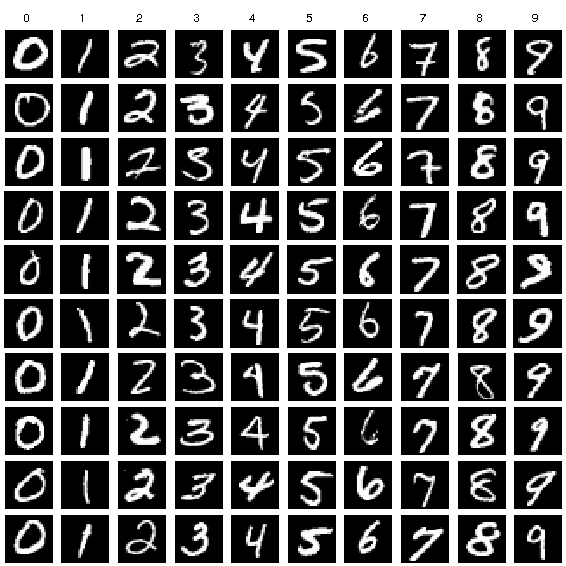

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [98]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [99]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


#### 1.2 Dataset examination

Using the following code, display random images,

In [100]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

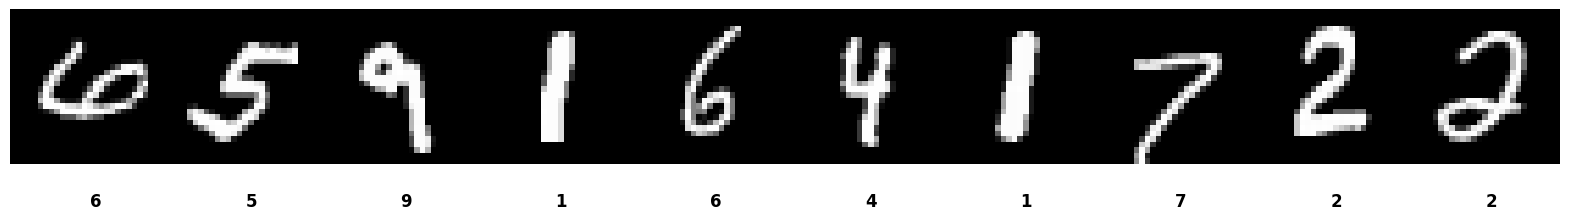

In [101]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?

28x28 pixels 8-bit grayscale image. the labels are numbers between 0 and 9
- How many data samples do we have in train and test datasets?

there are 60000 samples in the train dataset and 10000 samples in the test dataset.
- How many colour channels does the input variable have?

1 8-bit color channel
- What is the size of the input images?

28x28 pixels
- What is the necessary preprocessing of the input data X?

we need to normalize the data to scale them between 0 and 1
- How many classes do we have in target varoable?

10
- What is the necessary preprocessing of target variable y?

convert it into one hot encoding

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [102]:
###################################
# Write your own code here #

#data normalization from 8bit value to 0-1 float
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#reshape the input data and add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#encode the output to one hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    


#### 2.1 Define the model structure

In [103]:
model = Sequential()
###################################
# Write your own code here #

#convolutian layer for NN, with 3x3 kernel, relu and 32 filters
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

#reduce spatial dimensions 2x2
model.add(MaxPool2D(pool_size=(2,2)))

#flatten to connect to next layer
model.add(Flatten())

#add 128 neuron layer
model.add(Dense(256, activation='relu'))

#add output layer with softmax activation and 10 elements
model.add(Dense(10, activation='softmax'))


###################################


c:\Users\marou\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem 

In [104]:

###################################
# Write your own code here #

#compile the model with adam optimizer 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


###################################
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       692,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 695,210 (2.65 MB)

 Trainable params: 695,210 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [105]:
###################################
# Write your own code here #

#train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split = 0.15)


###################################

Epoch 1/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8622 - loss: 0.4795 - val_accuracy: 0.9752 - val_loss: 0.0903
Epoch 2/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9758 - loss: 0.0838 - val_accuracy: 0.9838 - val_loss: 0.0627
Epoch 3/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9868 - loss: 0.0480 - val_accuracy: 0.9838 - val_loss: 0.0545
Epoch 4/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9907 - loss: 0.0326 - val_accuracy: 0.9867 - val_loss: 0.0498
Epoch 5/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9931 - loss: 0.0243 - val_accuracy: 0.9873 - val_loss: 0.0479
Epoch 6/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9950 - loss: 0.0176 - val_accuracy: 0.9857 - val_loss: 0.0538
Epoch 7/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.9878 - val_loss: 0.0493
Epoch 8/25
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

In [ ]:
###################################
# Write your own code here #

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')


###################################

Test loss: 0.05554240196943283
Test accuracy: 98.78000020980835 %


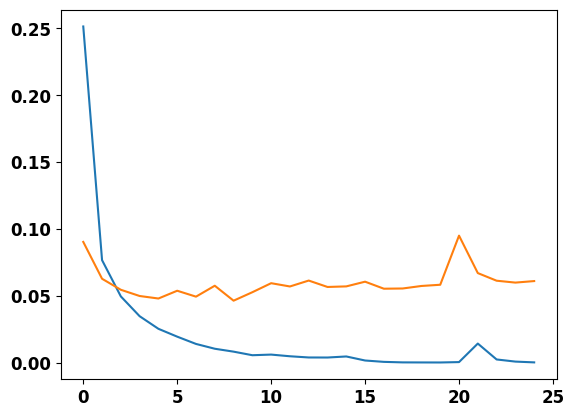

In [107]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

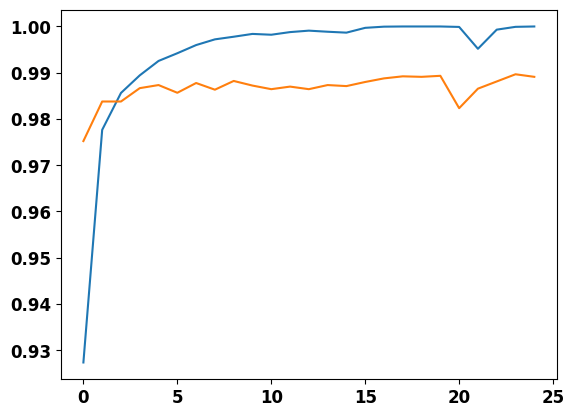

In [108]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


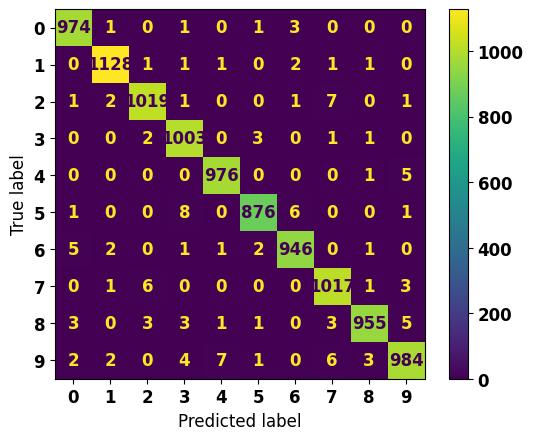

In [109]:
###################################
# Write your own code here #

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#the model was trained on the 60k samples with validation split of 0.2. The confusion matrix was evaluated using the test dataset with the rest of 10k samples.
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_decoded = np.argmax(y_test, axis=1)

confusion_matrix(y_test_decoded, y_predict)
ConfusionMatrixDisplay.from_predictions(y_test_decoded,y_predict)


###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it